# Sales Performance Analytics — Day 1
## Data Cleaning & KPI Identification
**Internship Task | Data Science**

**Objective:** Load the raw business development dataset, explore its structure, identify and fix all data quality issues, and prepare a clean dataset ready for KPI calculation on Day 2.

In [2]:
# ─────────────────────────────────────────
# Import Libraries
# ─────────────────────────────────────────

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

print("Libraries imported successfully")

Libraries imported successfully


In [3]:
# ─────────────────────────────────────────
# Load Raw Dataset
# ─────────────────────────────────────────

df_raw = pd.read_csv('../data/raw/BD_KPI_Raw_Dataset.csv')

print(f"Dataset loaded successfully")
print(f"Shape: {df_raw.shape[0]} rows × {df_raw.shape[1]} columns")
print(f"\n{'='*50}")
print("COLUMN NAMES:")
print(df_raw.columns.tolist())

Dataset loaded successfully
Shape: 700 rows × 9 columns

COLUMN NAMES:
['Lead_ID', 'Lead_Source', 'Lead_Date', 'Conversion_Status', 'Conversion_Date', 'Revenue_Value', 'Marketing_Cost', 'Sales_Representative', 'Region']


In [4]:
# ─────────────────────────────────────────
# First 10 Rows
# ─────────────────────────────────────────

print("── First 10 Rows ──")
df_raw.head(10)

── First 10 Rows ──


,Lead_ID,Lead_Source,Lead_Date,Conversion_Status,Conversion_Date,Revenue_Value,Marketing_Cost,Sales_Representative,Region
0,LEAD-0043,referral,04-02-2024,NaN,NaN,0,3036.1,David Brown,EAST
1,LEAD-0199,referral,02-07-2024,converted,2024/06/06,10390.1,NaN,NaN,West
2,LEAD-0526,email campaign,2023-02-11,NOT CONVERTED,NaN,NaN,3021.93,DAVID BROWN,West
3,LEAD-0638,email campaign,09/09/2023,Not Converted,09/09/2023,0,unknown,David Brown,South
4,LEAD-0067,Website,29-04-2023,NaN,NaN,NaN,2095.58,NaN,EAST
5,LEAD-0130,email campaign,2023-10-01,No,2023-10-01,0,4120.59,alice johnson,NORTH
6,LEAD-0567,Social Media,2024/06/22,CONVERTED,2024-08-15,12684.79,1676.86,alice johnson,south
7,LEAD-0626,Referral,2024-03-09,Not Converted,NaN,0,3148.67,NaN,North
8,LEAD-0680,DIRECT,03-22-2024,NOT CONVERTED,NaN,NaN,3497.45,NaN,West
9,LEAD-0155,DIRECT,2023/09/28,Yes,23/10/2023,14310.82,4912.19,NaN,EAST


In [5]:
print("── Data Types ──")
print(df_raw.dtypes)

print(f"\n── Basic Info ──")
df_raw.info()

── Data Types ──
Lead_ID                 object
Lead_Source             object
Lead_Date               object
Conversion_Status       object
Conversion_Date         object
Revenue_Value           object
Marketing_Cost          object
Sales_Representative    object
Region                  object
dtype: object

── Basic Info ──
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Lead_ID               690 non-null    object
 1   Lead_Source           661 non-null    object
 2   Lead_Date             700 non-null    object
 3   Conversion_Status     640 non-null    object
 4   Conversion_Date       327 non-null    object
 5   Revenue_Value         537 non-null    object
 6   Marketing_Cost        682 non-null    object
 7   Sales_Representative  570 non-null    object
 8   Region                618 non-null    object
dtypes: object(9)


In [6]:
# ─────────────────────────────────────────
# EDA Before Cleaning
# ─────────────────────────────────────────

print("=" * 55)
print("      DATA QUALITY ISSUES REPORT (Before Cleaning)")
print("=" * 55)

# 1. Missing values
print("\n1. NULL / MISSING VALUES:")
null_counts = df_raw.isnull().sum()
null_pct = (null_counts / len(df_raw) * 100).round(2)
missing_df = pd.DataFrame({'Missing Count': null_counts, 'Missing %': null_pct})
print(missing_df[missing_df['Missing Count'] > 0])

# 2. Duplicate rows
print(f"\n2. DUPLICATE ROWS: {df_raw.duplicated().sum()}")

# 3. Unique values in categorical columns
print("\n3. UNIQUE VALUES IN CATEGORICAL COLUMNS:")
cat_cols = ['Lead_Source', 'Conversion_Status', 'Region', 'Sales_Representative']
for col in cat_cols:
    print(f"\n  [{col}]")
    print(" ", df_raw[col].unique())

      DATA QUALITY ISSUES REPORT (Before Cleaning)

1. NULL / MISSING VALUES:
                      Missing Count  Missing %
Lead_ID                          10       1.43
Lead_Source                      39       5.57
Conversion_Status                60       8.57
Conversion_Date                 373      53.29
Revenue_Value                   163      23.29
Marketing_Cost                   18       2.57
Sales_Representative            130      18.57
Region                           82      11.71

2. DUPLICATE ROWS: 17

3. UNIQUE VALUES IN CATEGORICAL COLUMNS:

  [Lead_Source]
  ['referral' 'email campaign' 'Website' 'Social Media' 'Referral' 'DIRECT'
 'website' 'direct' 'Email Campaign' 'EMAIL CAMPAIGN' 'Direct'
 'SOCIAL MEDIA' nan 'social media']

  [Conversion_Status]
  [nan 'converted' 'NOT CONVERTED' 'Not Converted' 'No' 'CONVERTED' 'Yes'
 'Pending' 'Converted' 'not converted']

  [Region]
  ['EAST' 'West' 'South' 'NORTH' 'south' 'North' nan 'East' 'north' 'west']

  [Sales_Represe

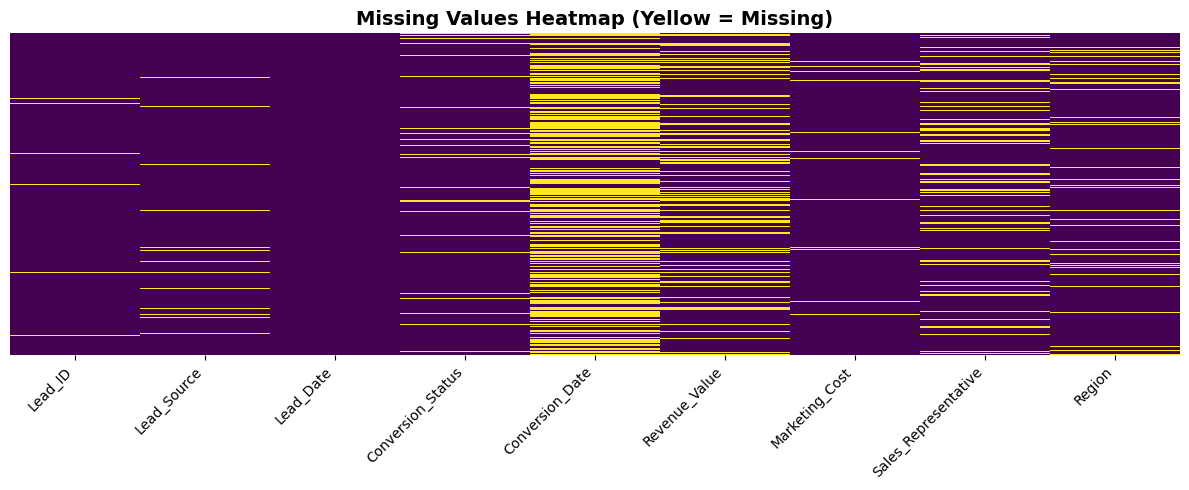

Chart saved to reports/


In [7]:
# Visualize missing values heatmap

plt.figure(figsize=(12, 5))
sns.heatmap(df_raw.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap (Yellow = Missing)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('../reports/missing_values_heatmap.png', dpi=150)
plt.show()
print("Chart saved to reports/")

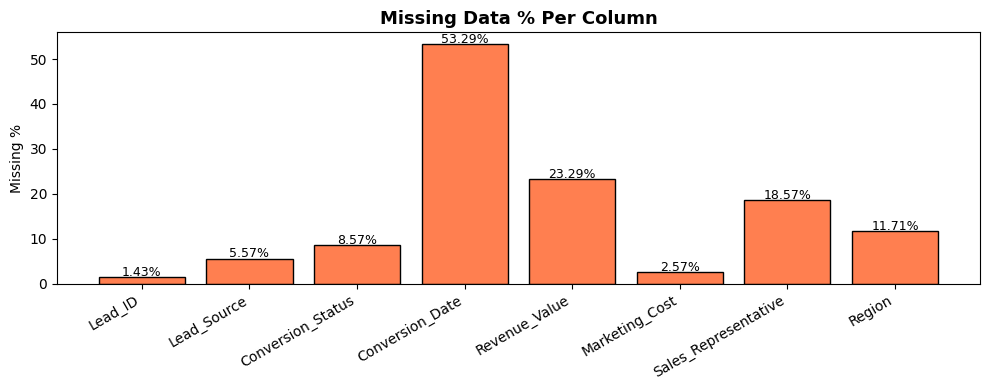

In [8]:
# Bar chart of missing values

missing_only = missing_df[missing_df['Missing Count'] > 0]
plt.figure(figsize=(10, 4))
bars = plt.bar(missing_only.index, missing_only['Missing %'], color='coral', edgecolor='black')
plt.title('Missing Data % Per Column', fontsize=13, fontweight='bold')
plt.ylabel('Missing %')
plt.xticks(rotation=30, ha='right')
for bar, val in zip(bars, missing_only['Missing %']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3, f'{val}%', ha='center', fontsize=9)
plt.tight_layout()
plt.savefig('../reports/missing_bar_chart.png', dpi=150)
plt.show()

In [9]:
# ─────────────────────────────────────────
# Create Working Copy
# ─────────────────────────────────────────

df = df_raw.copy()
print(f"Working copy created with shape: {df.shape}")

Working copy created with shape: (700, 9)


In [11]:
# ─────────────────────────────────────────
# Fix Lead_ID Column
# ─────────────────────────────────────────

print(f"Missing Lead_IDs before: {df['Lead_ID'].isnull().sum()}")

# Generate IDs for missing rows
missing_mask = df['Lead_ID'].isnull()     # Creates a boolean mask
max_existing = df['Lead_ID'].dropna().str.extract(r'(\d+)').astype(int).max()[0]     # Find the highest existing Lead number

new_ids = [f'LEAD-{max_existing + i + 1:04d}' for i in range(missing_mask.sum())]      # Generates new IDs starting after the current maximum
df.loc[missing_mask, 'Lead_ID'] = new_ids      # Assign new IDs to missing rows

print(f"Missing Lead_IDs after: {df['Lead_ID'].isnull().sum()}")
print("Lead_ID cleaned")

Missing Lead_IDs before: 0
Missing Lead_IDs after: 0
Lead_ID cleaned


In [13]:
# ─────────────────────────────────────────
# Remove Duplicate Rows
# ─────────────────────────────────────────

print(f"Rows before removing duplicates: {len(df)}")
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
print(f"Rows after removing duplicates:  {len(df)}")
print("Duplicates removed")

Rows before removing duplicates: 700
Rows after removing duplicates:  683
Duplicates removed


In [14]:
# ─────────────────────────────────────────
# Standardize Lead_Source
# ─────────────────────────────────────────

print("Before standardization:")
print(df['Lead_Source'].value_counts(dropna=False))

# Step 1: Strip whitespace and convert to Title Case
df['Lead_Source'] = df['Lead_Source'].str.strip().str.title()

# Step 2: Fix any remaining inconsistencies
source_map = {
    'Email Campaign': 'Email Campaign',
    'Social Media': 'Social Media',
    'Referral': 'Referral',
    'Website': 'Website',
    'Direct': 'Direct'
}
df['Lead_Source'] = df['Lead_Source'].map(source_map)

# Step 3: Fill missing with 'Unknown'
df['Lead_Source'].fillna('Unknown', inplace=True)

print("\nAfter standardization:")
print(df['Lead_Source'].value_counts())
print("Lead_Source standardized")

Before standardization:
Lead_Source
email campaign    56
Social Media      55
Website           53
Direct            53
Email Campaign    52
Referral          52
SOCIAL MEDIA      51
DIRECT            49
referral          47
EMAIL CAMPAIGN    46
social media      45
website           45
direct            41
NaN               38
Name: count, dtype: int64

After standardization:
Lead_Source
Email Campaign    154
Social Media      151
Direct            143
Referral           99
Website            98
Unknown            38
Name: count, dtype: int64
Lead_Source standardized


In [15]:
# ─────────────────────────────────────────
# Parse & Fix Date Columns
# ─────────────────────────────────────────

def parse_mixed_dates(series):     # Defines a reusable function that cleans any date column
    """Parse dates with multiple possible formats"""
    formats = ['%Y-%m-%d', '%d/%m/%Y', '%m-%d-%Y', '%d-%m-%Y', '%Y/%m/%d']     # Define accepted date formats
    parsed = pd.Series([pd.NaT] * len(series), index=series.index)     # Create an empty datetime Series
    
    for fmt in formats:      # Try parsing using each format
        mask = parsed.isna() & series.notna()      # Parse only unprocessed values
        try:
            parsed[mask] = pd.to_datetime(series[mask], format=fmt, errors='coerce')      # Convert strings to datetime
        except:
            pass
    return parsed      # Return parsed column

print("Parsing Lead_Date...")
df['Lead_Date'] = parse_mixed_dates(df['Lead_Date'])     # Parse Lead_Date

print("Parsing Conversion_Date...")
df['Conversion_Date'] = parse_mixed_dates(df['Conversion_Date'])      # Parse Conversion_Date

print(f"\nLead_Date nulls after parsing:       {df['Lead_Date'].isnull().sum()}")
print(f"Conversion_Date nulls after parsing: {df['Conversion_Date'].isnull().sum()}")
print(f"\nDate range: {df['Lead_Date'].min().date()} → {df['Lead_Date'].max().date()}")
print("Dates parsed successfully")

Parsing Lead_Date...
Parsing Conversion_Date...

Lead_Date nulls after parsing:       0
Conversion_Date nulls after parsing: 366

Date range: 2023-01-02 → 2024-12-06
Dates parsed successfully


In [16]:
# ─────────────────────────────────────────
# Standardize Conversion_Status
# ─────────────────────────────────────────

print("Before:")
print(df['Conversion_Status'].value_counts(dropna=False))

# Map all variants to standard values
status_map = {
    'Converted'    : 'Converted',
    'converted'    : 'Converted',
    'CONVERTED'    : 'Converted',
    'Yes'          : 'Converted',
    'Not Converted': 'Not Converted',
    'not converted': 'Not Converted',
    'NOT CONVERTED': 'Not Converted',
    'No'           : 'Not Converted',
    'Pending'      : 'Not Converted',
}

df['Conversion_Status'] = df['Conversion_Status'].map(status_map)
df['Conversion_Status'].fillna('Not Converted', inplace=True)

print("\nAfter:")
print(df['Conversion_Status'].value_counts())
print("Conversion_Status standardized")

Before:
Conversion_Status
NOT CONVERTED    86
not converted    83
CONVERTED        76
No               72
converted        68
Yes              67
Converted        61
NaN              58
Not Converted    57
Pending          55
Name: count, dtype: int64

After:
Conversion_Status
Not Converted    411
Converted        272
Name: count, dtype: int64
Conversion_Status standardized


In [19]:
# ─────────────────────────────────────────
# Fix Conversion Date Logic
# ─────────────────────────────────────────

# Rule 1: Not Converted leads should NOT have a Conversion_Date
mask_not_conv = df['Conversion_Status'] == 'Not Converted'      # Creates a boolean mask for leads not converted
df.loc[mask_not_conv, 'Conversion_Date'] = pd.NaT      # Explicitly removes any Conversion_Date for not converted rows

# Rule 2: Conversion_Date must be same or AFTER Lead_Date
mask_invalid = (
    df['Conversion_Status'] == 'Converted'
) & (
    df['Conversion_Date'] < df['Lead_Date']
)
print(f"Invalid conversion dates (before lead date): {mask_invalid.sum()}")
df.loc[mask_invalid, 'Conversion_Date'] = pd.NaT  # Fix invalid conversion dates(Set to NaT for now)

print("Conversion date logic fixed")

Invalid conversion dates (before lead date): 0
Conversion date logic fixed


In [21]:
# ─────────────────────────────────────────
# Clean Revenue_Value
# ─────────────────────────────────────────

print("Sample Revenue_Value before cleaning:")
print(df['Revenue_Value'].head(20).tolist())

# Remove dollar signs and convert to numeric
df['Revenue_Value'] = df['Revenue_Value'].astype(str).str.replace('$', '', regex=False).str.strip()
df['Revenue_Value'] = pd.to_numeric(df['Revenue_Value'], errors='coerce')

# Replace negative/zero revenue for converted leads with NaN
mask_conv = df['Conversion_Status'] == 'Converted'
df.loc[mask_conv & (df['Revenue_Value'] <= 0), 'Revenue_Value'] = np.nan

# Fill remaining NaN revenue for converted leads with median
median_rev = df.loc[mask_conv, 'Revenue_Value'].median()
df.loc[mask_conv & df['Revenue_Value'].isna(), 'Revenue_Value'] = median_rev

# Non-converted leads: revenue should be 0
df.loc[~mask_conv, 'Revenue_Value'] = 0

print(f"\nMedian revenue used for imputation: ${median_rev:,.2f}")
print(f"Revenue_Value nulls after cleaning: {df['Revenue_Value'].isnull().sum()}")
print(f"Revenue range: ${df['Revenue_Value'].min():,.2f} — ${df['Revenue_Value'].max():,.2f}")
print("Revenue_Value cleaned")

Sample Revenue_Value before cleaning:
[0.0, 10390.1, 0.0, 0.0, 0.0, 0.0, 12684.79, 0.0, 0.0, 14310.82, 0.0, 0.0, 37767.96, 23711.59, 12544.17, 4737.84, 35350.34, 20572.64, 17481.8, 8517.36]

Median revenue used for imputation: $23,915.81
Revenue_Value nulls after cleaning: 0
Revenue range: $0.00 — $49,806.77
Revenue_Value cleaned


In [22]:
# ─────────────────────────────────────────
# Clean Marketing_Cost
# ─────────────────────────────────────────

# Remove $ signs and convert to numeric
df['Marketing_Cost'] = df['Marketing_Cost'].astype(str).str.replace('$', '', regex=False).str.strip()
df['Marketing_Cost'] = pd.to_numeric(df['Marketing_Cost'], errors='coerce')

# Replace negatives with NaN
df.loc[df['Marketing_Cost'] < 0, 'Marketing_Cost'] = np.nan

# Impute missing with median
median_cost = df['Marketing_Cost'].median()
df['Marketing_Cost'].fillna(median_cost, inplace=True)

print(f"Median cost used for imputation: ${median_cost:,.2f}")
print(f"Marketing_Cost nulls after: {df['Marketing_Cost'].isnull().sum()}")
print(f"Cost range: ${df['Marketing_Cost'].min():,.2f} — ${df['Marketing_Cost'].max():,.2f}")
print("Marketing_Cost cleaned")

Median cost used for imputation: $2,639.44
Marketing_Cost nulls after: 0
Cost range: $57.81 — $4,999.50
Marketing_Cost cleaned


In [23]:
# ─────────────────────────────────────────
# Standardize Region
# ─────────────────────────────────────────

df['Region'] = df['Region'].str.strip().str.title()
df['Region'].fillna('Unknown', inplace=True)

print("Region values:")
print(df['Region'].value_counts())
print("Region standardized")

Region values:
Region
North      185
East       163
South      140
West       116
Unknown     79
Name: count, dtype: int64
Region standardized


In [24]:
# ─────────────────────────────────────────
# Standardize Sales_Representative
# ─────────────────────────────────────────

df['Sales_Representative'] = df['Sales_Representative'].str.strip().str.title()     # Normalize text formatting

# Replace 'N/A' or 'N/a' string with actual NaN, then fill
df['Sales_Representative'].replace('N/A', np.nan, inplace=True)
df['Sales_Representative'].replace('N/a', np.nan, inplace=True)
df['Sales_Representative'].fillna('Unassigned', inplace=True)

print("Sales Rep values:")
print(df['Sales_Representative'].value_counts())
print("Sales_Representative standardized")

Sales Rep values:
Sales_Representative
Unassigned       125
David Brown      110
Alice Johnson     95
Eve Davis         94
Frank Miller      91
Carol White       89
Bob Smith         79
Name: count, dtype: int64
Sales_Representative standardized


In [26]:
# ─────────────────────────────────────────
# Add Helper Columns for KPI
# ─────────────────────────────────────────

# Sales Cycle Duration (days)
df['Sales_Cycle_Days'] = (df['Conversion_Date'] - df['Lead_Date']).dt.days

# Month-Year for trend analysis
df['Lead_Month'] = df['Lead_Date'].dt.to_period('M')
df['Lead_Year']  = df['Lead_Date'].dt.year

# Is Converted as binary (useful for calculations)
df['Is_Converted'] = (df['Conversion_Status'] == 'Converted').astype(int)

print("Helper columns added:")
print(df[['Lead_Date', 'Conversion_Date', 'Sales_Cycle_Days', 'Lead_Month', 'Is_Converted']].head(10))

Helper columns added:
   Lead_Date Conversion_Date  Sales_Cycle_Days Lead_Month  Is_Converted
0 2024-04-02             NaT               NaN    2024-04             0
1 2024-02-07      2024-06-06            120.00    2024-02             1
2 2023-02-11             NaT               NaN    2023-02             0
3 2023-09-09             NaT               NaN    2023-09             0
4 2023-04-29             NaT               NaN    2023-04             0
5 2023-10-01             NaT               NaN    2023-10             0
6 2024-06-22      2024-08-15             54.00    2024-06             1
7 2024-03-09             NaT               NaN    2024-03             0
8 2024-03-22             NaT               NaN    2024-03             0
9 2023-09-28      2023-10-23             25.00    2023-09             1


In [27]:
# ─────────────────────────────────────────
# Check After Cleaning
# ─────────────────────────────────────────

print("=" * 55)
print("DATA QUALITY ISSUES REPORT (Before Cleaning)")
print("=" * 55)

# 1. Missing values
print("\n📍 1. NULL / MISSING VALUES:")
null_counts = df.isnull().sum()
null_pct = (null_counts / len(df) * 100).round(2)
missing_df = pd.DataFrame({'Missing Count': null_counts, 'Missing %': null_pct})
print(missing_df[missing_df['Missing Count'] > 0])

# 2. Duplicate rows
print(f"\n📍 2. DUPLICATE ROWS: {df.duplicated().sum()}")

# 3. Unique values in categorical columns
print("\n📍 3. UNIQUE VALUES IN CATEGORICAL COLUMNS:")
cat_cols = ['Lead_Source', 'Conversion_Status', 'Region', 'Sales_Representative']
for col in cat_cols:
    print(f"\n  [{col}]")
    print(" ", df[col].unique())

DATA QUALITY ISSUES REPORT (Before Cleaning)

📍 1. NULL / MISSING VALUES:
                  Missing Count  Missing %
Conversion_Date             428      62.66
Sales_Cycle_Days            428      62.66

📍 2. DUPLICATE ROWS: 0

📍 3. UNIQUE VALUES IN CATEGORICAL COLUMNS:

  [Lead_Source]
  ['Referral' 'Email Campaign' 'Website' 'Social Media' 'Direct' 'Unknown']

  [Conversion_Status]
  ['Not Converted' 'Converted']

  [Region]
  ['East' 'West' 'South' 'North' 'Unknown']

  [Sales_Representative]
  ['David Brown' 'Unassigned' 'Alice Johnson' 'Bob Smith' 'Eve Davis'
 'Carol White' 'Frank Miller']


In [29]:
# ─────────────────────────────────────────
# Post-Cleaning Summary
# ─────────────────────────────────────────

print("=" * 55)
print("CLEANING SUMMARY REPORT")
print("=" * 55)
print(f"  Original rows        : 700")
print(f"  Rows after cleaning  : {len(df)}")
print(f"  Columns              : {df.shape[1]}")
print(f"\n  Remaining nulls:")
print(df.isnull().sum()[df.isnull().sum() > 0])
print(f"\n  Conversion breakdown:")
print(df['Conversion_Status'].value_counts())
print(f"\n  Revenue stats (converted leads):")
print(df[df['Is_Converted']==1]['Revenue_Value'].describe())

CLEANING SUMMARY REPORT
  Original rows        : 700
  Rows after cleaning  : 683
  Columns              : 13

  Remaining nulls:
Conversion_Date     428
Sales_Cycle_Days    428
dtype: int64

  Conversion breakdown:
Conversion_Status
Not Converted    411
Converted        272
Name: count, dtype: int64

  Revenue stats (converted leads):
count     272.00
mean    24790.74
std     14214.04
min       553.77
25%     12514.28
50%     23915.81
75%     36641.86
max     49806.77
Name: Revenue_Value, dtype: float64


In [ ]:
# ─────────────────────────────────────────
# KPI Identification (Documentation)
# ─────────────────────────────────────────

kpi_df = pd.DataFrame({
    'KPI': [
        'Lead Conversion Rate',
        'Customer Acquisition Cost (CAC)',
        'Revenue per Client',
        'Monthly Growth Rate',
        'Sales Cycle Duration',
        'Lead Source Performance'
    ],
    'Formula': [
        '(Converted Leads / Total Leads) × 100',
        'Total Marketing Cost / No. of Converted Leads',
        'Total Revenue / No. of Converted Leads',
        '((Current Month Leads - Prev Month) / Prev Month) × 100',
        'Average(Conversion_Date - Lead_Date) in days',
        'Conversion Rate & Revenue grouped by Lead_Source'
    ],
    'Columns_Used': [
        'Conversion_Status',
        'Marketing_Cost, Conversion_Status',
        'Revenue_Value, Conversion_Status',
        'Lead_Date, Lead_Month',
        'Sales_Cycle_Days',
        'Lead_Source, Conversion_Status, Revenue_Value'
    ],
    'Day_Calculated': ['Day 2'] * 6
})

print("KPIs to be Calculated:\n")
print(kpi_df.to_string(index=False))